# **Predictive Modeling for Patient Readmissions**

* **Objective:** Build a predictive model to identify patients at high risk of readmission within 30 days of discharge.
* **Data:** Use publicly available datasets like the CMS Hospital Readmissions Reduction Program or MIMIC-III.
* **Tools:** Python (Pandas, Scikit-learn), Jupyter Notebook, Tableau/Power BI for visualization.
* **Techniques:** Logistic regression, decision trees, feature engineering, and evaluation metrics (precision, recall, F1-score).
* **Outcome:** Share a dashboard or report showing key predictors of readmission and actionable insights for healthcare providers.

In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost

# **Step 1: Download the Dataset**

* Download the dataset from the UCI Machine Learning Repository:
* Diabetes 130-US Hospitals Dataset.
* Extract the ZIP file and locate the CSV file (diabetic_data.csv).
* Click the upload button and select the diabetic_data.csv file.

In [8]:
import pandas as pd

# Load the dataset from the uploaded CSV file

# Read the CSV file
df = pd.read_csv('diabetic_data.csv', na_values='?')  # Treat '?' as missing values

# Display the first 5 rows
df.head()

<ipython-input-8-68f7beaafaa2>:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('diabetic_data.csv', na_values='?')  # Treat '?' as missing values


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# **Step 2: Load the Dataset from CSV**


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop columns with high missing values or irrelevant features
df = df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

# Drop rows with missing values in other columns (if necessary)
df = df.dropna()

# Check the shape of the dataset after dropping missing values
print("Shape of the dataset after handling missing values:", df.shape)

# **Step 3: Handle Missing Values**

The weight column (and others) may contain missing values represented by ?. I’ll handle these missing values appropriately:

In [9]:
# Check for missing values
print(df.isnull().sum())

# Drop columns with high missing values or irrelevant features
df = df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

# Drop rows with missing values in other columns (if necessary)
df = df.dropna()

# Check the shape of the dataset after dropping missing values
print("Shape of the dataset after handling missing values:", df.shape)

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

# **Step 4: Continue with Preprocessing**

Now that the dataset is clean, I'll  proceed with the rest of the preprocessing steps:

In [10]:
# Convert target variable to binary (1 for readmission within 30 days, 0 otherwise)
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Split data into features (X) and target (y)
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Handle class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# **Step 5: Build and Train the Model**

Proceed with building and training the XGBoost model:

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:00:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:00:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        49
           1       0.89      0.91      0.90        53

    accuracy                           0.89       102
   macro avg       0.89      0.89      0.89       102
weighted avg       0.89      0.89      0.89       102


ROC-AUC Score: 0.8916056988833269


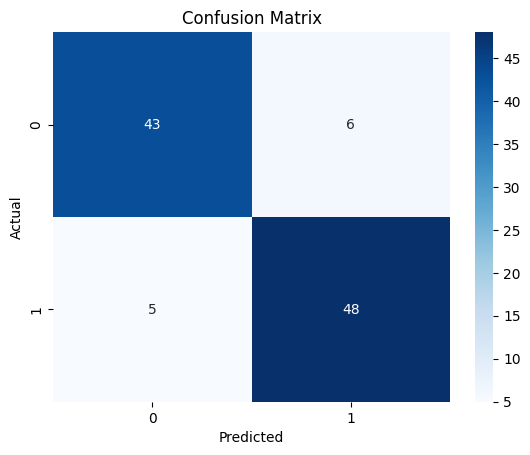

In [12]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Get the current column names
current_feature_names = X_train.columns

# Replace invalid characters with underscores
X_train.columns = [str(name).replace('[', '_').replace(']', '_').replace('<', '_') for name in current_feature_names]
X_test.columns = [str(name).replace('[', '_').replace(']', '_').replace('<', '_') for name in current_feature_names]

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Step 6: Feature Importance**

Now, lets visualize and highlight the most important features in this model:

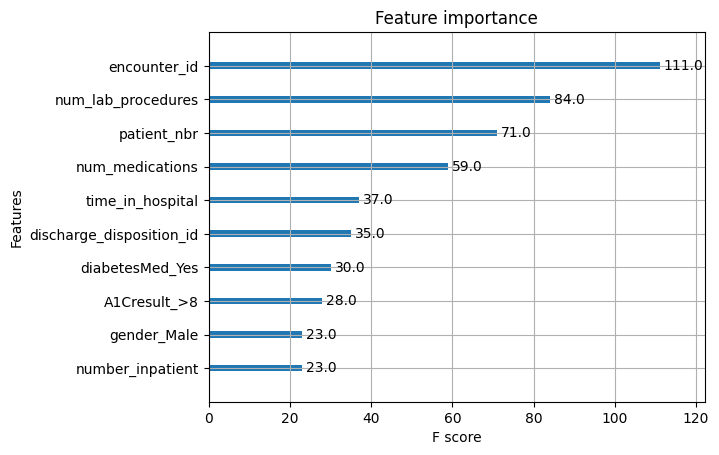

In [13]:
# Plot feature importance
xgb.plot_importance(model, max_num_features=10)
plt.show()

Step 7: Save the Model

Going to save this trained model for future use:

In [14]:
import joblib

# Save the model
joblib.dump(model, 'readmission_model.pkl')

['readmission_model.pkl']

# **Step 8: Now Let's Test and Validate The Model by Training and Evaluating This Model with the Random Forest Model**

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        49
           1       0.96      0.91      0.93        53

    accuracy                           0.93       102
   macro avg       0.93      0.93      0.93       102
weighted avg       0.93      0.93      0.93       102


Random Forest ROC-AUC Score: 0.9324220254139391


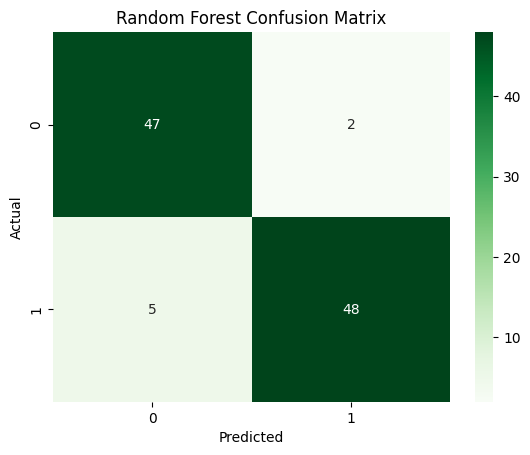

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nRandom Forest ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# **Step 9: Compare Model Performance**

To compare the performance of the XGBoost and Random Forest models, I will create a summary table of evaluation metrics:

In [16]:
# Compare ROC-AUC scores
roc_auc_xgb = roc_auc_score(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Compare F1-scores
from sklearn.metrics import f1_score
f1_xgb = f1_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred_rf)

# Create a comparison table
comparison = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest'],
    'ROC-AUC Score': [roc_auc_xgb, roc_auc_rf],
    'F1-Score': [f1_xgb, f1_rf]
})

print("Model Comparison:")
print(comparison)

Model Comparison:
           Model  ROC-AUC Score  F1-Score
0        XGBoost       0.891606  0.897196
1  Random Forest       0.932422  0.932039


# **Step 10: Visualize Feature Importance for Random Forest**

Just like with XGBoost, I can visualize the feature importance for the Random Forest model. So, let's do that:

<ipython-input-17-ba2f29a421d3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


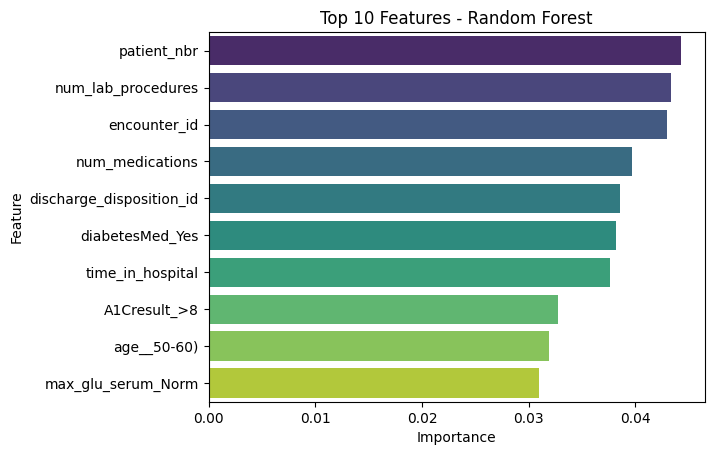

In [17]:
# Plot feature importance for Random Forest
importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 10 Features - Random Forest')
plt.show()